In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from get_processed_data import get_processed_data
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids, NearMiss
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow import keras
from sampling import undersample, oversample, smote, ncr
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_curve, auc, confusion_matrix,
    roc_auc_score, precision_recall_curve
)

### Splitting data

In [36]:
df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()
# X_train.to_csv(r"C:\Users\760421\Downloads\P_FAILING_HEAD.csv", index=False)


Training set shape: (12335, 55) (12335,)
Validation set shape: (1542, 55) (1542,)
Test set shape: (1542, 55) (1542,)


In [37]:
input_size = X_train.shape[1]  # Number of features in the input layer
output_size = 1  # For binary classification

# Choose the number of neurons for the hidden layer
hidden_layer_neurons = int((input_size + output_size) / 2)
hidden_layer_neurons


28

In [38]:
# def ann():
#     model = keras.Sequential([
#     layers.Dense(28, activation='relu', input_shape=(55,)),
#     # layers.Dense(10, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
#     ])
   
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model

def ann(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_units=16, learning_rate=0.01):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(55,)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_ann(X_train, y_train, X_test, y_test, sampling_technique,class_weights=None,param_grid=None):
    
    # model = KerasClassifier(build_fn=ann, epochs=10)
    model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.0, 
                            hidden_units=16, learning_rate=0.01, batch_size=32, epochs=40)

    model.fit(X_train, y_train, class_weight=class_weights)
    # model.fit(X_train, y_train, epochs=30, batch_size=32,class_weight=class_weights)
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    Recall = round(recall_score(y_test, y_pred)*100,2)
    Precision = round(precision_score(y_test, y_pred)*100,2)
    f1 = round(f1_score(y_test, y_pred)*100,2)
    accuracy = round(accuracy_score(y_test, y_pred)*100,2)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

Epoch 1/40


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


386/386 [==============================] - 1s 997us/step - loss: 31.4079 - accuracy: 0.7798
Epoch 2/40
386/386 [==============================] - 0s 979us/step - loss: 0.3466 - accuracy: 0.9215
Epoch 3/40
386/386 [==============================] - 0s 1ms/step - loss: 0.2983 - accuracy: 0.9311
Epoch 4/40
386/386 [==============================] - 0s 1ms/step - loss: 0.2677 - accuracy: 0.9363
Epoch 5/40
386/386 [==============================] - 0s 979us/step - loss: 0.2516 - accuracy: 0.9400
Epoch 6/40
386/386 [==============================] - 0s 979us/step - loss: 0.2497 - accuracy: 0.9394
Epoch 7/40
386/386 [==============================] - 0s 971us/step - loss: 0.2584 - accuracy: 0.9386
Epoch 8/40
386/386 [==============================] - 0s 974us/step - loss: 0.2342 - accuracy: 0.9400
Epoch 9/40
386/386 [==============================] - 0s 971us/step - loss: 0.2275 - accuracy: 0.9398
Epoch 10/40
386/386 [==============================] - 0s 971us/step - loss: 0.2319 - accuracy: 

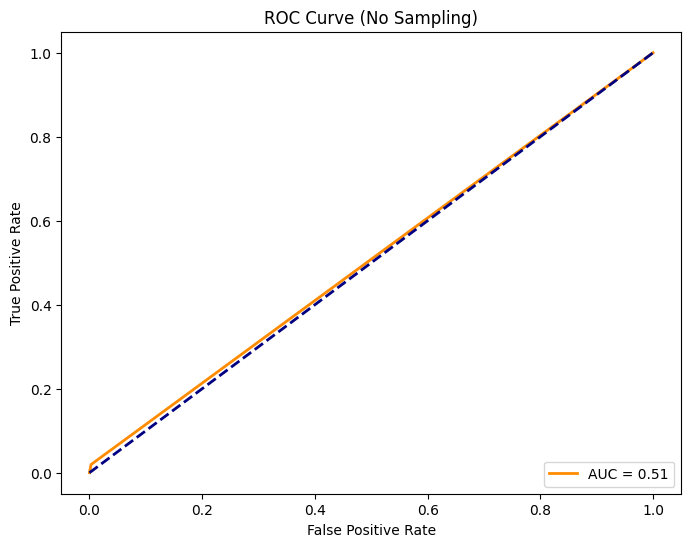

Epoch 1/40


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 1ms/step - loss: 0.2990 - accuracy: 0.8780
Epoch 2/40
726/726 [==============================] - 1s 1ms/step - loss: 0.1673 - accuracy: 0.9384
Epoch 3/40
726/726 [==============================] - 1s 1ms/step - loss: 0.1495 - accuracy: 0.9444
Epoch 4/40
726/726 [==============================] - 1s 1ms/step - loss: 0.1405 - accuracy: 0.9467
Epoch 5/40
726/726 [==============================] - 1s 1ms/step - loss: 0.1345 - accuracy: 0.9476
Epoch 6/40
726/726 [==============================] - 1s 1ms/step - loss: 0.1305 - accuracy: 0.9488
Epoch 7/40
726/726 [==============================] - 1s 1ms/step - loss: 0.1272 - accuracy: 0.9501
Epoch 8/40
726/726 [==============================] - 1s 1ms/step - loss: 0.1249 - accuracy: 0.9511
Epoch 9/40
726/726 [==============================] - 1s 1ms/step - loss: 0.1227 - accuracy: 0.9514
Epoch 10/40
726/726 [==============================] - 1s 1ms/step - loss: 0.1210 - accuracy: 0.9514
Epoch 11/4

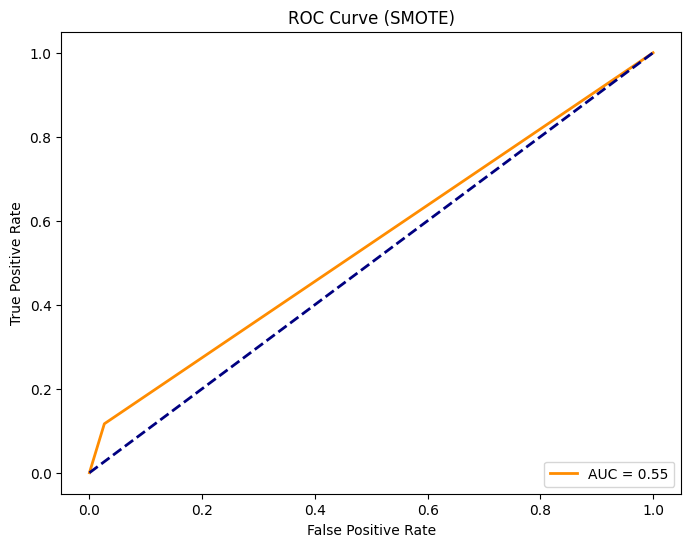

Epoch 1/40


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 983us/step - loss: 0.5785 - accuracy: 0.6957
Epoch 2/40
726/726 [==============================] - 1s 979us/step - loss: 0.4796 - accuracy: 0.7727
Epoch 3/40
726/726 [==============================] - 1s 974us/step - loss: 0.4492 - accuracy: 0.7884
Epoch 4/40
726/726 [==============================] - 1s 967us/step - loss: 0.4297 - accuracy: 0.8008
Epoch 5/40
726/726 [==============================] - 1s 968us/step - loss: 0.4157 - accuracy: 0.8093
Epoch 6/40
726/726 [==============================] - 1s 978us/step - loss: 0.4039 - accuracy: 0.8160
Epoch 7/40
726/726 [==============================] - 1s 975us/step - loss: 0.3948 - accuracy: 0.8212
Epoch 8/40
726/726 [==============================] - 1s 970us/step - loss: 0.3875 - accuracy: 0.8262
Epoch 9/40
726/726 [==============================] - 1s 975us/step - loss: 0.3820 - accuracy: 0.8307
Epoch 10/40
726/726 [==============================] - 1s 967us/step - loss: 0.3760 - accurac

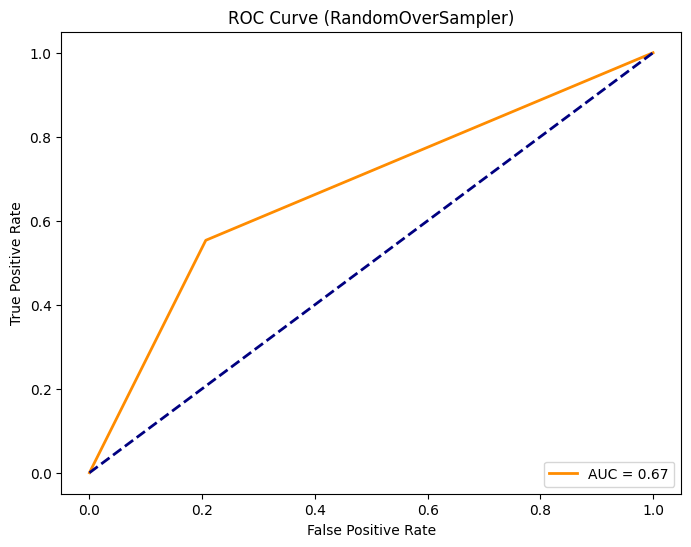

Epoch 1/40


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


46/46 [==============================] - 0s 1ms/step - loss: 0.7891 - accuracy: 0.5449
Epoch 2/40
46/46 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5946
Epoch 3/40
46/46 [==============================] - 0s 1ms/step - loss: 0.6301 - accuracy: 0.6423
Epoch 4/40
46/46 [==============================] - 0s 978us/step - loss: 0.5963 - accuracy: 0.6720
Epoch 5/40
46/46 [==============================] - 0s 978us/step - loss: 0.5700 - accuracy: 0.7072
Epoch 6/40
46/46 [==============================] - 0s 978us/step - loss: 0.5484 - accuracy: 0.7383
Epoch 7/40
46/46 [==============================] - 0s 1000us/step - loss: 0.5297 - accuracy: 0.7541
Epoch 8/40
46/46 [==============================] - 0s 1ms/step - loss: 0.5132 - accuracy: 0.7735
Epoch 9/40
46/46 [==============================] - 0s 1ms/step - loss: 0.4982 - accuracy: 0.7804
Epoch 10/40
46/46 [==============================] - 0s 1ms/step - loss: 0.4853 - accuracy: 0.7852
Epoch 11/40
46/46 [==

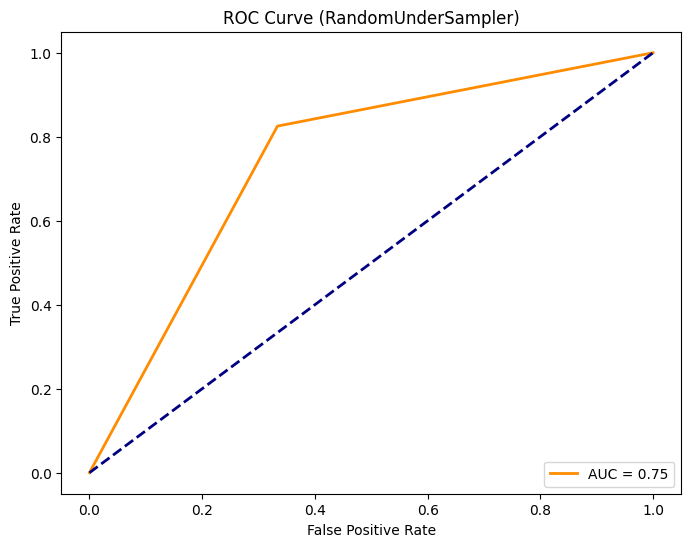

In [39]:
results = {}
scaler = StandardScaler()
#No Sampling
metrics = train_ann(X_train,y_train,X_test,y_test,'No Sampling')
results[metrics[0]] = metrics[1:]

# smote = SMOTE(random_state=42)
# X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_smote, y_smote = smote(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_smote, X_test_scaled, y_test,'SMOTE')
results[metrics[0]] = metrics[1:]

# ros = RandomOverSampler(random_state=42)
# X_over, y_over = ros.fit_resample(X_train, y_train)
X_over, y_over = oversample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_over)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_over, X_test_scaled, y_test,'RandomOverSampler')
results[metrics[0]] = metrics[1:]


# rus = RandomUnderSampler(random_state=42)
# X_under, y_under = rus.fit_resample(X_train, y_train)
X_under, y_under = undersample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_under)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_under, X_test_scaled, y_test,'RandomUnderSampler')
results[metrics[0]] = metrics[1:]

# X_ncr, y_ncr = ncr(X_train, y_train)
# metrics = train_ann(X_ncr, y_ncr, X_test, y_test,'NCR')
# results[metrics[0]] = metrics[1:]

In [40]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['F1 Score', 'Precision', 'Recall', 'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomUnderSampler,82.52,15.04,25.45,67.70
RandomOverSampler,55.34,16.10,24.95,77.76
SMOTE,11.65,24.00,15.69,91.63
No Sampling,1.94,33.33,3.67,93.19


```Hyper-Parameter Tuning```

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define the function to create the model
def create_model(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_units=16, learning_rate=0.01):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(55,)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier for use in GridSearchCV
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0,activation = "relu", 
                        dropout_rate=0,hidden_units=16, learning_rate=0.01)

# Define the hyperparameters to tune
param_grid = {
    'optimizer': ['adam'],  # Optimizer choices
    'activation': ['relu', 'sigmoid'],  # Activation functions
    'hidden_units': [8, 16, 32],  # Number of neurons in the hidden layer(s)
    'learning_rate': [0.001, 0.01, 0.1],  # Learning rate for the optimizer
    'batch_size': [32],  # Batch size for training
    'epochs': [40, 20, 30],  # Number of training epochs
    'dropout_rate': [0.0, 0.1],
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(f1_score), cv=3)
grid_result = grid.fit(X_over, y_over)

# Print the best parameters and accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\760421\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Err

Best: 0.803368 using {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 40, 'hidden_units': 32, 'learning_rate': 0.1, 'optimizer': 'adam'}
